[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/logoinpe.png?raw=true" width = 500 align="left">](https://www.gov.br/inpe/pt-br)

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/LogoCAP.png?raw=true" width = 300 align="right">](http://www.inpe.br/posgraduacao/cap/)

# **CAP-340 Problemas Inversos**
## **Esta atividade trata da identificação da condição inicial no problema de condução de calor em uma barra metálica usando um algoritmo genético (AG), em que para formulação do problema inverso, o problema é tratado como um problema de otimização**

**Docente:** *Haroldo Fraga de Campos Velho*

**Discente:** *Lourenço José Cavalcante Neto*

---


<img src="https://github.com/lourencocavalcante/CAP-340-Problemas-Inversos/blob/main/Exerc_parte1.PNG?raw=true" width = 800 align="center">
<img src="https://github.com/lourencocavalcante/CAP-340-Problemas-Inversos/blob/main/Exerc_parte2.PNG?raw=true" width = 800 align="center">

## 1. Resolver o problema direto da equação do calor

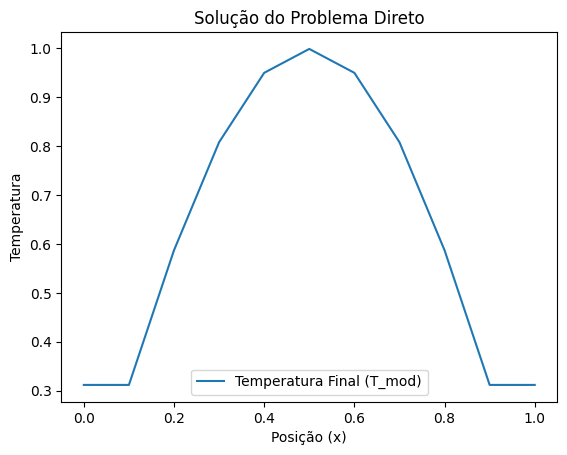

In [1]:
# Título do notebook: Item 1 - Resolução do Problema Direto da Equação do Calor

# Parâmetros físicos
alpha = 0.01  # Difusividade térmica
Lx = 1.0      # Comprimento da barra
dx = 0.1      # Passo espacial
tau = 0.01    # Tempo total da simulação

# Função para resolver a equação do calor usando diferenças finitas explícitas
def solve_heat_equation(f):
    """
    Resolve numericamente a equação do calor ao longo do tempo.
    Retorna a temperatura final T no tempo t = tau.
    """
    nx = len(f)                # Número de pontos espaciais
    dx = Lx / (nx - 1)         # Reajuste do passo espacial
    dt = 1e-4                  # Passo temporal para estabilidade
    nt = int(tau / dt)         # Número de passos no tempo
    r = alpha * dt / dx**2     # Número de Courant
    
    # Inicialização das temperaturas
    T = np.zeros((nt, nx))     # Matriz para armazenar as temperaturas no tempo
    T[0, :] = f                # Define a condição inicial
    
    # Método explícito: atualiza temperatura no tempo
    for n in range(0, nt - 1):
        T[n + 1, 1:-1] = T[n, 1:-1] + r * (T[n, :-2] - 2 * T[n, 1:-1] + T[n, 2:])
        T[n + 1, 0] = T[n + 1, 1]   # Condição de contorno esquerda
        T[n + 1, -1] = T[n + 1, -2] # Condição de contorno direita
    
    return T[-1, :]  # Retorna T final no tempo tau

# Teste: Condição inicial sinusoidal
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, Lx, int(Lx / dx) + 1)
initial_condition = np.sin(np.pi * x)

# Solução do problema direto
final_temperature = solve_heat_equation(initial_condition)

# Gráfico da solução
plt.plot(x, final_temperature, label="Temperatura Final (T_mod)")
plt.xlabel("Posição (x)")
plt.ylabel("Temperatura")
plt.title("Solução do Problema Direto")
plt.legend()
plt.show()


## 2. Construir o conjunto de soluções candidatas

In [14]:
population_size = 200  # Número de indivíduos na população

def initialize_population(size, length):
    """
    Gera uma população inicial de soluções candidatas aleatórias no intervalo [-1, 1].
    """
    return [np.random.uniform(-1, 1, length) for _ in range(size)]

# Teste da função: Geração da população inicial
length = len(x)  # Número de pontos na barra
population = initialize_population(population_size, length)

# Visualizar as primeiras 5 soluções candidatas
print("Primeiras 5 soluções candidatas, das 200:")
for i in range(5):
    print(population[i])


Primeiras 5 soluções candidatas, das 200:
[-0.00726754  0.89686418 -0.87793523 -0.6395119   0.6389142   0.63427348
 -0.23291959 -0.48579586 -0.34587699 -0.34073319  0.93632006]
[ 0.80563696 -0.70867242 -0.37610061 -0.91851151  0.62689306 -0.23527039
  0.57374623  0.60498977 -0.03758021  0.10486099  0.58178896]
[-0.00425192 -0.06058409 -0.52497846 -0.1857235   0.70298943 -0.42139715
  0.15336003 -0.30361334  0.7460161  -0.22173623  0.14837242]
[-0.92963761  0.93188921  0.85700697  0.97253858 -0.01199551  0.21253169
 -0.31049123  0.76267619 -0.6980244   0.99219802  0.18370744]
[ 0.9274781  -0.75692204 -0.23851407 -0.18582909  0.73147727 -0.78740924
 -0.84118073  0.14442668  0.6481705  -0.01464717  0.57927483]


## 3. Implementar o elitismo no Algoritmo Genético

In [8]:
elite_fraction = 0.3  # Proporção de elitismo (30%)
elite_size = int(elite_fraction * population_size)

def preserve_elite(population, fitness, elite_fraction):
    """
    Seleciona os 30% melhores indivíduos da população (estratégia elitista).
    """
    elite_size = int(elite_fraction * len(population))
    sorted_indices = np.argsort(fitness)
    return [population[i] for i in sorted_indices[:elite_size]]

# Teste da função: preservar a elite
fitness = np.random.rand(population_size)  # Simula valores aleatórios de fitness
elite = preserve_elite(population, fitness, elite_fraction)

print(f"Selecionados {len(elite)} melhores indivíduos da elite. Vamos listar os 5 primeiros:\n")
print(elite[:5])


Selecionados 60 melhores indivíduos da elite. Vamos listar os 5 primeiros:

[array([-0.96975059, -0.30234654,  0.55746211, -0.10196845, -0.71719361,
       -0.29718153, -0.20738071,  0.08949207,  0.29685116, -0.25680922,
       -0.49856525]), array([-0.22307935,  0.95941173, -0.07675696,  0.53237411, -0.29338047,
        0.99659059, -0.43750431,  0.10439198, -0.9330329 , -0.88196508,
       -0.18227622]), array([ 0.43598574,  0.8267012 ,  0.59549088, -0.73973739, -0.43468264,
       -0.72311467,  0.20553836, -0.28183717,  0.99047821,  0.23055404,
       -0.95558384]), array([ 0.37661708,  0.82153919, -0.04861306,  0.14167052, -0.40007185,
       -0.28952354, -0.10079597, -0.06581492, -0.83519856,  0.66729772,
        0.59128051]), array([-0.0770587 , -0.82600796,  0.79196209,  0.40569434,  0.51543648,
       -0.24735215,  0.24647738,  0.64682893, -0.76845687, -0.4876949 ,
       -0.70711767])]


## 4. Aplicar seleção, cruzamento e mutação

In [10]:
# Função de seleção via torneio
def select_parents(population, fitness):
    """
    Seleção via torneio: escolhe o melhor entre dois indivíduos aleatórios.
    """
    idx1, idx2 = np.random.choice(len(population), size=2, replace=False)
    return population[idx1] if fitness[idx1] < fitness[idx2] else population[idx2]

# Função de cruzamento
def crossover(parent1, parent2):
    """
    Cruzamento em um ponto aleatório para gerar um filho.
    """
    point = np.random.randint(1, len(parent1) - 1)
    return np.concatenate((parent1[:point], parent2[point:]))

# Função de mutação
def mutate(individual, rate):
    """
    Aplica mutação ao indivíduo com uma taxa específica.
    """
    for i in range(len(individual)):
        if np.random.rand() < rate:
            individual[i] += np.random.uniform(-0.1, 0.1)
    return individual

# Teste de seleção, cruzamento e mutação
parent1 = elite[0]
parent2 = elite[1]
child = crossover(parent1, parent2)
mutated_child = mutate(child, rate=0.05)

print("Pai 1:", parent1, "\n")
print("Pai 2:", parent2, "\n")
print("Filho gerado (crossover):", child, "\n")
print("Filho após mutação:", mutated_child, "\n")


Pai 1: [-0.96975059 -0.30234654  0.55746211 -0.10196845 -0.71719361 -0.29718153
 -0.20738071  0.08949207  0.29685116 -0.25680922 -0.49856525] 

Pai 2: [-0.22307935  0.95941173 -0.07675696  0.53237411 -0.29338047  0.99659059
 -0.43750431  0.10439198 -0.9330329  -0.88196508 -0.18227622] 

Filho gerado (crossover): [-0.96975059 -0.30234654  0.55746211 -0.10196845 -0.71719361 -0.29718153
 -0.43750431  0.10439198 -0.9330329  -0.88196508 -0.2712729 ] 

Filho após mutação: [-0.96975059 -0.30234654  0.55746211 -0.10196845 -0.71719361 -0.29718153
 -0.43750431  0.10439198 -0.9330329  -0.88196508 -0.2712729 ] 



## Resultado Final: Aqui juntaremos todos os passos para o Algoritmo Genético (AG)

Geração 1, Melhor solução: 1.586265
Geração 2, Melhor solução: 1.568408
Geração 3, Melhor solução: 0.711392
Geração 4, Melhor solução: 0.711392
Geração 5, Melhor solução: 0.640623
Geração 6, Melhor solução: 0.640623
Geração 7, Melhor solução: 0.640623
Geração 8, Melhor solução: 0.339903
Geração 9, Melhor solução: 0.293292
Geração 10, Melhor solução: 0.277412
Geração 11, Melhor solução: 0.277412
Geração 12, Melhor solução: 0.214215
Geração 13, Melhor solução: 0.205037
Geração 14, Melhor solução: 0.121292
Geração 15, Melhor solução: 0.110275
Geração 16, Melhor solução: 0.107392
Geração 17, Melhor solução: 0.107137
Geração 18, Melhor solução: 0.095671
Geração 19, Melhor solução: 0.095102
Geração 20, Melhor solução: 0.091403
Geração 21, Melhor solução: 0.068258
Geração 22, Melhor solução: 0.065189
Geração 23, Melhor solução: 0.061342
Geração 24, Melhor solução: 0.058216
Geração 25, Melhor solução: 0.042124
Geração 26, Melhor solução: 0.042124
Geração 27, Melhor solução: 0.039632
Geração 28

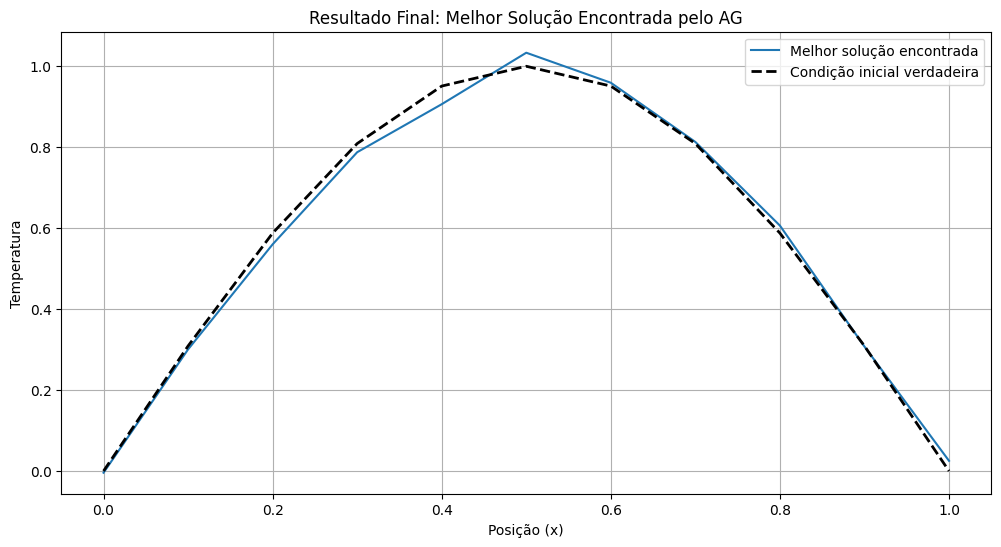

In [12]:
# Título do notebook: Resultado Final - Aplicação Completa do AG

# Parâmetros gerais
population_size = 200         # Tamanho da população inicial
generations = 100             # Número máximo de gerações
elite_fraction = 0.3          # Proporção da população preservada como elite
initial_mutation_rate = 0.05  # Taxa inicial de mutação
mutation_decay = 0.99         # Decaimento da mutação
convergence_threshold = 1e-6  # Critério de parada baseado na convergência
beta = 0.005                  # Parâmetro de regularização

# Importando as funções que já definimos anteriormente
def objective_function(f, T_obs, positions):
    T_mod = solve_heat_equation(f)
    misfit = np.sum((T_obs - T_mod)**2)  # Erro quadrático
    regularization = beta * np.sum(f**2)
    return misfit + regularization

def select_parents(population, fitness):
    idx1, idx2 = np.random.choice(len(population), size=2, replace=False)
    return population[idx1] if fitness[idx1] < fitness[idx2] else population[idx2]

def preserve_elite(population, fitness, elite_fraction):
    elite_size = int(elite_fraction * len(population))
    sorted_indices = np.argsort(fitness)
    return [population[i] for i in sorted_indices[:elite_size]]

def crossover(parent1, parent2):
    point = np.random.randint(1, len(parent1) - 1)
    return np.concatenate((parent1[:point], parent2[point:]))

def mutate(individual, rate):
    for i in range(len(individual)):
        if np.random.rand() < rate:
            individual[i] += np.random.uniform(-0.1, 0.1)
    return individual

def genetic_algorithm(T_obs, positions, length):
    """
    Implementa o AG para otimizar a condição inicial.
    """
    mutation_rate = initial_mutation_rate
    population = initialize_population(population_size, length)
    best_solutions = []

    for gen in range(generations):
        # Calcula o fitness para cada indivíduo
        fitness = [objective_function(ind, T_obs, positions) for ind in population]
        
        # Elitismo: preserva os melhores
        elite = preserve_elite(population, fitness, elite_fraction)
        new_population = elite[:]
        
        while len(new_population) < population_size:
            parent1 = select_parents(population, fitness)
            parent2 = select_parents(population, fitness)
            child = mutate(crossover(parent1, parent2), mutation_rate)
            new_population.append(child)
        
        population = new_population
        best_idx = np.argmin(fitness)
        best_solutions.append(fitness[best_idx])
        
        print(f"Geração {gen+1}, Melhor solução: {fitness[best_idx]:.6f}")
        
        # Critério de convergência
        if len(best_solutions) > 5 and max(best_solutions[-5:]) - min(best_solutions[-5:]) < convergence_threshold:
            print(f"Convergência atingida na geração {gen+1}")
            break
        
        mutation_rate *= mutation_decay  # Redução da mutação

    return population[np.argmin(fitness)], best_solutions

# Posições e condição inicial verdadeira
x = np.linspace(0, Lx, int(Lx / dx) + 1)     # Posições discretizadas
true_initial_condition = np.sin(np.pi * x)  # Condição inicial

# Gerar observações sintéticas com ruído
T_obs = solve_heat_equation(true_initial_condition) * (1 + 0.05 * np.random.uniform(-1, 1, len(x)))

# Executar o AG
best_solution, best_solutions = genetic_algorithm(T_obs, x, len(x))

# Visualização dos Resultados
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Melhor solução vs condição inicial verdadeira
plt.plot(x, best_solution, label="Melhor solução encontrada")
plt.plot(x, true_initial_condition, 'k--', label="Condição inicial verdadeira", linewidth=2)
plt.title("Resultado Final: Melhor Solução Encontrada pelo AG")
plt.xlabel("Posição (x)")
plt.ylabel("Temperatura")
plt.legend()
plt.grid()
plt.show()


### Cálculo do T_mod

In [1]:
import numpy as np

# Parâmetros do problema
Lx = 1.0         # Comprimento da barra
alpha = 0.01     # Difusividade térmica
dx = 0.1         # Passo espacial
dt = 1e-4        # Passo temporal
tau = 0.01       # Tempo total da simulação
nx = int(Lx / dx) + 1  # Número de pontos espaciais
nt = int(tau / dt)     # Número de passos de tempo
r = alpha * dt / dx**2  # Número de Courant

# Inicialização das temperaturas
x = np.linspace(0, Lx, nx)  # Posições espaciais
T = np.zeros(nx)  # Temperatura inicial
T_new = np.zeros(nx)  # Nova temperatura

# Condição inicial: f(x) = sin(pi * x)
T[:] = np.sin(np.pi * x)

# Diferenças finitas explícitas para resolver o problema
for n in range(0, nt):
    for i in range(1, nx - 1):  # Ignora as extremidades
        T_new[i] = T[i] + r * (T[i - 1] - 2 * T[i] + T[i + 1])
    
    # Condições de contorno (fixas)
    T_new[0] = 0  # Temperatura na extremidade esquerda fixada
    T_new[-1] = 0  # Temperatura na extremidade direita fixada
    
    # Atualiza o valor de T para o próximo passo de tempo
    T[:] = T_new[:]

# Agora, percorrendo todas as posições x para imprimir T_mod
for i, pos in enumerate(x):
    print(f'Temperatura simulada T_mod na posição x = {pos:.1f} é: {T[i]:.4f}')


Temperatura simulada T_mod na posição x = 0.0 é: 0.0000
Temperatura simulada T_mod na posição x = 0.1 é: 0.3087
Temperatura simulada T_mod na posição x = 0.2 é: 0.5872
Temperatura simulada T_mod na posição x = 0.3 é: 0.8082
Temperatura simulada T_mod na posição x = 0.4 é: 0.9501
Temperatura simulada T_mod na posição x = 0.5 é: 0.9990
Temperatura simulada T_mod na posição x = 0.6 é: 0.9501
Temperatura simulada T_mod na posição x = 0.7 é: 0.8082
Temperatura simulada T_mod na posição x = 0.8 é: 0.5872
Temperatura simulada T_mod na posição x = 0.9 é: 0.3087
Temperatura simulada T_mod na posição x = 1.0 é: 0.0000


### Solução completa 02

Geração 1, Melhor solução: 2.444331
Geração 2, Melhor solução: 1.622241
Geração 3, Melhor solução: 1.278187
Geração 4, Melhor solução: 1.126053
Geração 5, Melhor solução: 1.086384
Geração 6, Melhor solução: 0.793414
Geração 7, Melhor solução: 0.556286
Geração 8, Melhor solução: 0.501282
Geração 9, Melhor solução: 0.294172
Geração 10, Melhor solução: 0.294172
Geração 11, Melhor solução: 0.294172
Geração 12, Melhor solução: 0.253056
Geração 13, Melhor solução: 0.191436
Geração 14, Melhor solução: 0.158521
Geração 15, Melhor solução: 0.144977
Geração 16, Melhor solução: 0.119169
Geração 17, Melhor solução: 0.103785
Geração 18, Melhor solução: 0.078707
Geração 19, Melhor solução: 0.061961
Geração 20, Melhor solução: 0.059289
Geração 21, Melhor solução: 0.054277
Geração 22, Melhor solução: 0.047112
Geração 23, Melhor solução: 0.043805
Geração 24, Melhor solução: 0.042788
Geração 25, Melhor solução: 0.040162
Geração 26, Melhor solução: 0.038341
Geração 27, Melhor solução: 0.036880
Geração 28

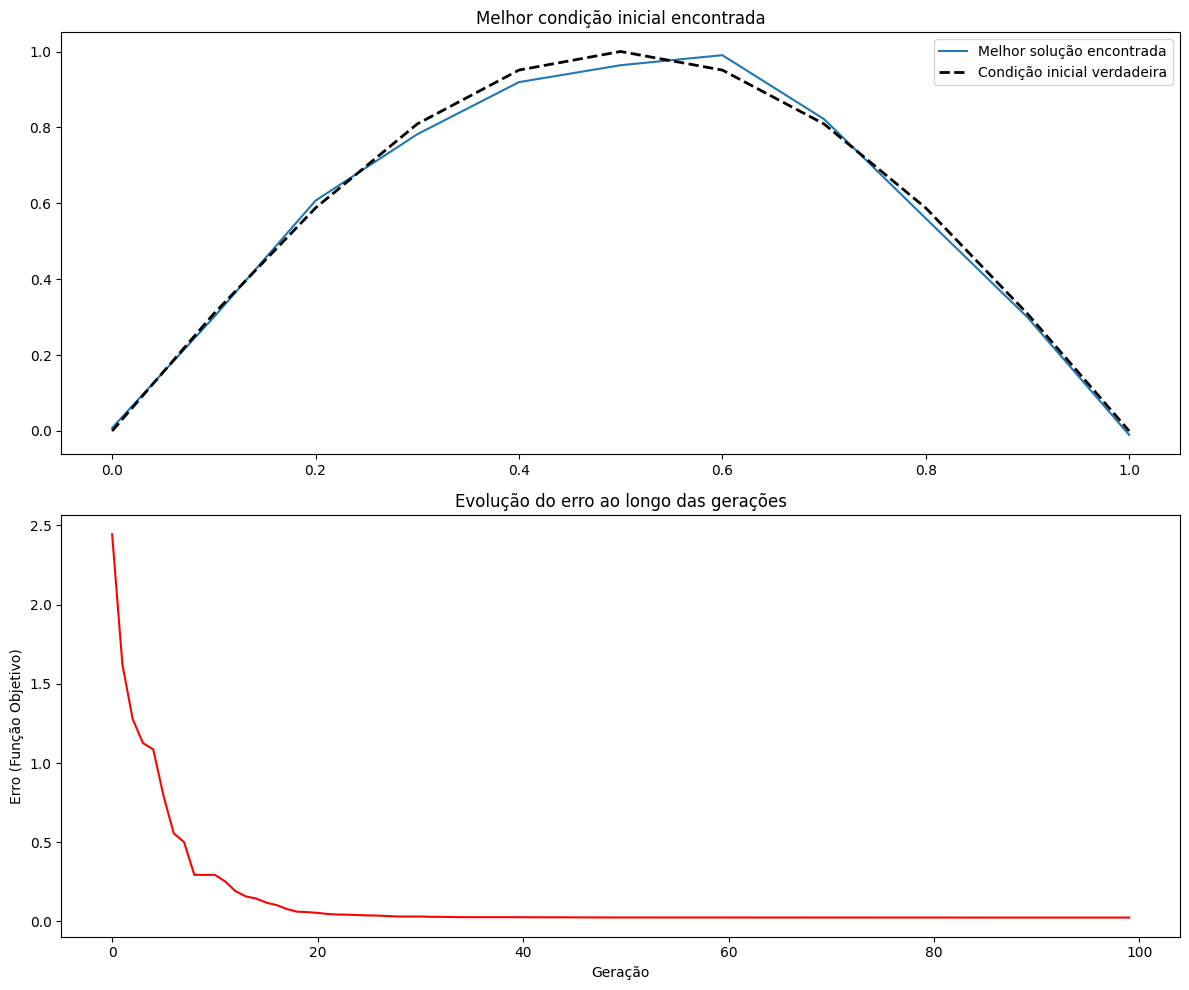

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ======================================================================
# Parâmetros do problema físico e do Algoritmo Genético (AG)
# ======================================================================
Lx = 1.0          # Comprimento da barra
alpha = 0.01      # Difusividade térmica
dx = 0.1          # Passo espacial
tau = 0.01        # Tempo total para a simulação da equação do calor
beta = 0.005      # Regularização (penaliza variações excessivas nas soluções)

# Parâmetros do Algoritmo Genético
population_size = 200         # Item 2: Conjunto de soluções candidatas (população inicial)
generations = 100             # Número máximo de gerações
elite_fraction = 0.3          # Item 3: 30% de elitismo preservado
initial_mutation_rate = 0.05  # Taxa inicial de mutação
mutation_decay = 0.99         # Decaimento da taxa de mutação
convergence_threshold = 1e-6  # Critério de parada para convergência do AG

# ======================================================================
# Item 1: Resolver o problema direto - Função principal da equação do calor
# ======================================================================
def solve_heat_equation(f):
    """
    Item 1: Resolve numericamente a equação do calor usando diferenças finitas explícitas.
    Entrada:
        - f: Condição inicial da temperatura ao longo da barra.
    Saída:
        - T[-1, :]: Distribuição de temperatura no tempo final tau.
    """
    nx = len(f)                 # Número de pontos espaciais
    dx = Lx / (nx - 1)          # Recalcula o passo espacial
    dt = 1e-4                   # Passo temporal pequeno para garantir estabilidade
    nt = int(tau / dt)          # Número total de passos no tempo
    r = alpha * dt / dx**2      # Parâmetro de Courant (critério de estabilidade, r <= 0.5)

    # Inicializa matriz de temperatura: nt no tempo, nx no espaço
    T = np.zeros((nt, nx))  # Matriz para armazenar a evolução temporal
    T[0, :] = f             # Define a condição inicial

    # Itera no tempo aplicando o método explícito de diferenças finitas
    for n in range(0, nt - 1):
        # Atualiza os pontos internos da barra
        T[n + 1, 1:-1] = T[n, 1:-1] + r * (T[n, :-2] - 2 * T[n, 1:-1] + T[n, 2:])
        # Condições de contorno isoladas (derivada nula nas extremidades)
        T[n + 1, 0] = T[n + 1, 1]
        T[n + 1, -1] = T[n + 1, -2]

    return T[-1, :]  # Retorna a distribuição final de temperatura no tempo tau

# ======================================================================
# Item 2: Conjunto inicial de soluções candidatas
# ======================================================================
def initialize_population(size, length):
    """
    Item 2: Cria uma população inicial de soluções candidatas aleatórias.
    Entrada:
        - size: Quantidade de indivíduos (população inicial).
        - length: Número de posições na barra.
    Saída:
        - Lista de soluções candidatas aleatórias entre [-1, 1].
    """
    return [np.random.uniform(-1, 1, length) for _ in range(size)]

# ======================================================================
# Funções auxiliares: objetivo, seleção, cruzamento e mutação
# ======================================================================
def objective_function(f, T_obs, positions):
    """
    Calcula a função objetivo a ser minimizada (erro + regularização).
    Entrada:
        - f: Solução candidata (condição inicial).
        - T_obs: Temperaturas observadas (dados com ruído).
        - positions: Posições da barra.
    Saída:
        - Valor da função objetivo.
    """
    T_mod = solve_heat_equation(f)             # Resolve o problema direto para f
    misfit = np.sum((T_obs - T_mod) ** 2)      # Erro quadrático
    regularization = beta * np.sum(f ** 2)     # Termo de regularização
    return misfit + regularization             # Erro total penalizado

def select_parents(population, fitness):
    """
    Item 4: Seleção de pais via torneio.
    Entrada:
        - population: Conjunto de soluções candidatas.
        - fitness: Valores de fitness associados à população.
    Saída:
        - Melhor indivíduo entre dois selecionados aleatoriamente.
    """
    idx1, idx2 = np.random.choice(len(population), size=2, replace=False)
    return population[idx1] if fitness[idx1] < fitness[idx2] else population[idx2]

def crossover(parent1, parent2):
    """
    Item 4: Cruzamento entre dois indivíduos em um ponto aleatório.
    """
    point = np.random.randint(1, len(parent1) - 1)
    return np.concatenate((parent1[:point], parent2[point:]))

def mutate(individual, rate):
    """
    Item 4: Aplica mutação em um indivíduo com probabilidade rate.
    """
    for i in range(len(individual)):
        if np.random.rand() < rate:
            individual[i] += np.random.uniform(-0.1, 0.1)  # Pequena variação aleatória
    return individual

# ======================================================================
# Item 3 e 4: Algoritmo Genético (AG) com elitismo, cruzamento e mutação
# ======================================================================
def genetic_algorithm(T_obs, positions, length):
    """
    Implementa o AG para otimizar a condição inicial que minimiza a função objetivo.
    """
    mutation_rate = initial_mutation_rate
    population = initialize_population(population_size, length)
    best_solutions = []  # Histórico dos melhores valores da função objetivo

    for gen in range(generations):
        # Calcula o fitness da população
        fitness = [objective_function(ind, T_obs, positions) for ind in population]

        # Elitismo: preserva os 30% melhores indivíduos
        elite_size = int(elite_fraction * population_size)
        elites = [population[i] for i in np.argsort(fitness)[:elite_size]]

        # Nova geração a partir da elite
        new_population = elites[:]
        while len(new_population) < population_size:
            parent1 = select_parents(population, fitness)
            parent2 = select_parents(population, fitness)
            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            new_population.append(child)

        population = new_population
        best_idx = np.argmin(fitness)
        best_solutions.append(fitness[best_idx])

        print(f"Geração {gen+1}, Melhor solução: {fitness[best_idx]:.6f}")
        if len(best_solutions) > 5 and max(best_solutions[-5:]) - min(best_solutions[-5:]) < convergence_threshold:
            break
        mutation_rate *= mutation_decay

    return population[best_idx], best_solutions

# ======================================================================
# Execução Principal
# ======================================================================
positions = np.linspace(0, Lx, int(Lx / dx) + 1)     # Posições discretizadas
true_initial_condition = np.sin(np.pi * positions)  # Condição inicial verdadeira
T_obs = solve_heat_equation(true_initial_condition) * (1 + 0.05 * np.random.uniform(-1, 1, len(positions)))

# Executar o AG
best_solution, best_solutions = genetic_algorithm(T_obs, positions, len(positions))

# ======================================================================
# Visualização dos Resultados
# ======================================================================
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Gráfico 1: Melhor condição inicial encontrada
axes[0].plot(positions, best_solution, label="Melhor solução encontrada")
axes[0].plot(positions, true_initial_condition, 'k--', label="Condição inicial verdadeira", linewidth=2)
axes[0].set_title("Melhor condição inicial encontrada")
axes[0].legend()

# Gráfico 2: Evolução do erro
axes[1].plot(best_solutions, color='r')
axes[1].set_title("Evolução do erro ao longo das gerações")
axes[1].set_xlabel("Geração")
axes[1].set_ylabel("Erro (Função Objetivo)")

plt.tight_layout()
plt.show()
